<a href="https://colab.research.google.com/github/reg4762/PembelajaranMesin_Ganjil_2024/blob/main/JobSheet7/TugasJS7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tugas Job Sheet 7 Clustering
## Nama     : Regita Delya Putri
## No. Absen: 21
## NIM      : 2241720137
## Kelas    : TI-3F


---

# TUGAS PRAKTIKUM

Buatlah sebuah model K-Means dengan ketentuan,

## 1. Gunakan data 'Mall_Customers.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv('/content/drive/MyDrive/Pembelajaran Mesin/week7/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

In [ ]:
X = df.iloc[:, 1:]

X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
from sklearn.preprocessing import StandardScaler

# Preprocessing: Standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## 3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

In [ ]:
cluster_range = range(2, 11)
silhouette_scores = []

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

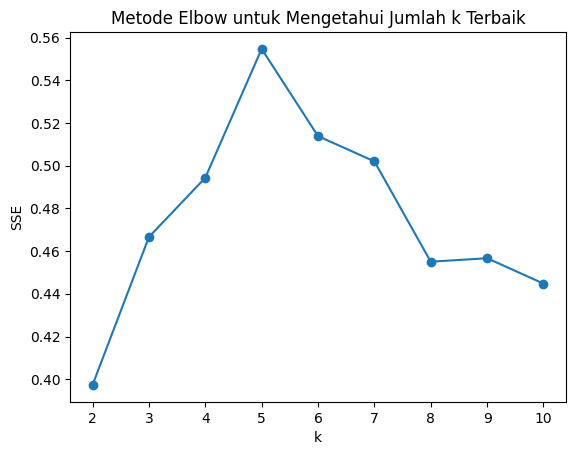

In [ ]:
# Plot metode elbow
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [ ]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

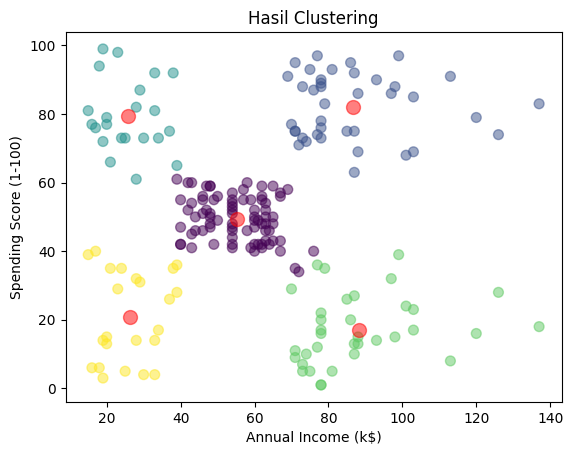

In [ ]:
# Visualisasi hasil clustering
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], s=50, c=df['Cluster'], cmap='viridis', alpha=0.5)

# Plot centroid
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Hasil Clustering')
plt.show()

## 4. Buatlah  implementasi model SOM untuk segmentasi citra lain

In [ ]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=5a8f1cf160f6729eeeccb3a91039c386d557bc38b1028041b6ce032efb652f5e
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [ ]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [ ]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

In [ ]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

In [ ]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

In [ ]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

In [ ]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

In [ ]:
rose_path = "/content/drive/MyDrive/Pembelajaran Mesin/week7/rose.jpg"
rose = io.imread(rose_path) / 255.0

In [ ]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(rose, num_epochs, initial_learning_rate, initial_neighborhood_radius)

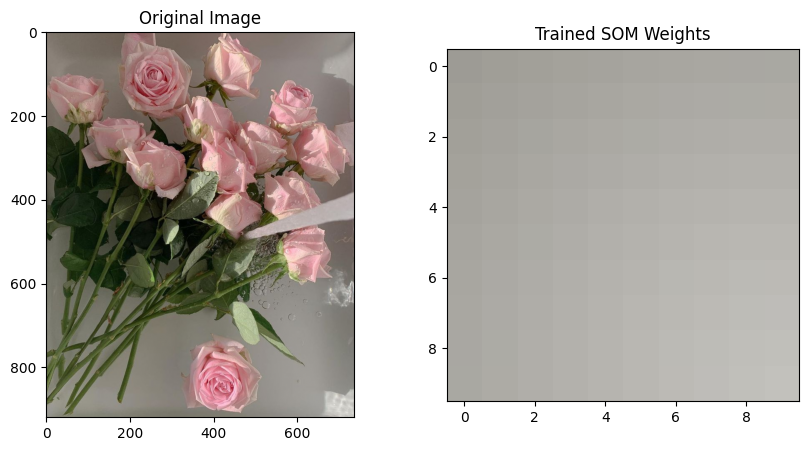

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(rose)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(trained_weights)
plt.title("Trained SOM Weights")

plt.show()